In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [62]:
def stratified_sampling(labeldir='/Users/elior/Desktop/DL Project Code/ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt',
                        imagedir='/Users/elior/Desktop/DL Project Code/ILSVRC2012_img_val',
                        pct: float = 0.02,
                        ) -> pd.DataFrame:
    """
    Helper function to sample the ILSVRC2012_img_val dataset in a stratified method.
    Parameters
    ----------
    folderdir
        Path to the 'ILSVRC2012_validation_ground_truth.txt' folder.
    imagedir
        Path to the 'ILSVRC2012_img_val' folder.
    pct
        Percentage of (image, label) pairs that are kept in the sampling process compared to the initial entire dataset.
    Returns
    -------
    pd.DataFrame
        A DataFrame of the sampled PIL images and their associated label.
    """
    # Collect every class label for each image
    with open(labeldir, 'r') as f:
        labels = f.read().splitlines()
    
    # Gather all images sorted like their associated label
    images = os.listdir(imagedir)
    images.sort()
    
    # Create a Dataframe with the images and labels
    merge_dict = {'images':images, 'labels':labels}
    df = pd.DataFrame(merge_dict)
    
    # Return a stratified sample of the dataset
    return df.groupby('labels', group_keys=False).apply(lambda x: x.sample(frac=pct, replace=False))


Sampled Dataset Size: 20000
                             images labels
46144  ILSVRC2012_val_00046145.JPEG      1
29682  ILSVRC2012_val_00029683.JPEG      1
16253  ILSVRC2012_val_00016254.JPEG      1
18312  ILSVRC2012_val_00018313.JPEG      1
42698  ILSVRC2012_val_00042699.JPEG      1
                             images labels
11359  ILSVRC2012_val_00011360.JPEG    999
1903   ILSVRC2012_val_00001904.JPEG    999
38787  ILSVRC2012_val_00038788.JPEG    999
13471  ILSVRC2012_val_00013472.JPEG    999
2568   ILSVRC2012_val_00002569.JPEG    999


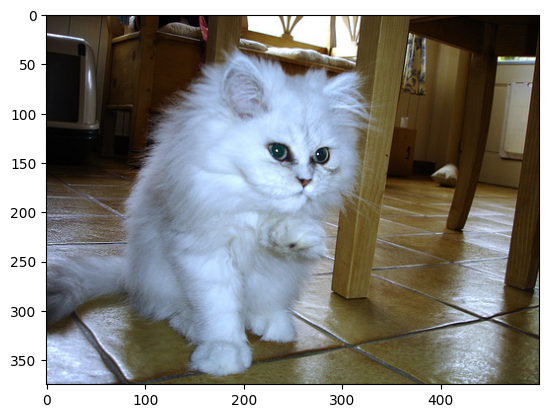

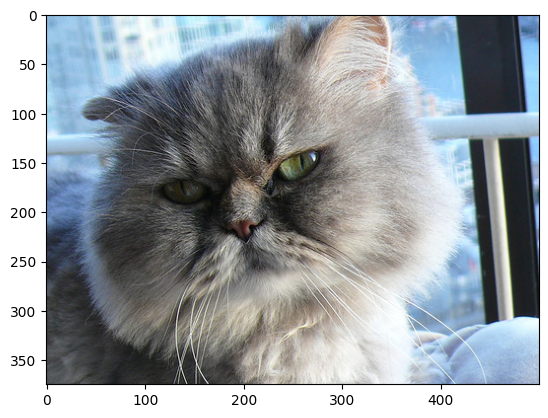

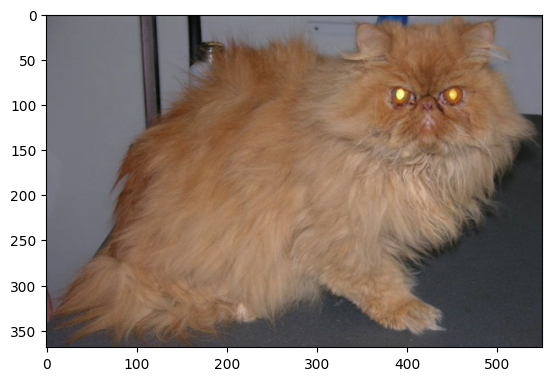

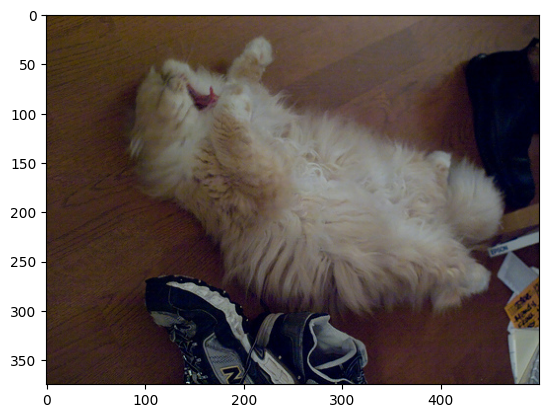

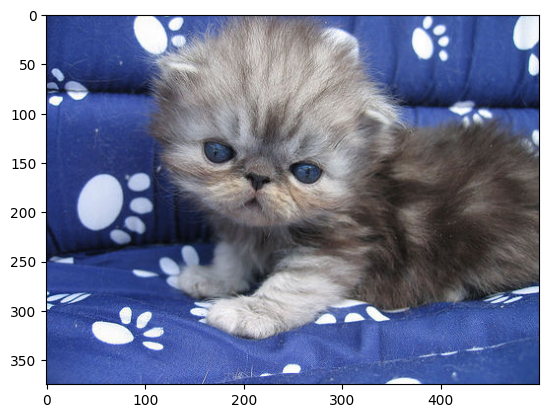

In [63]:
# Create the subset and display info
subset = stratified_sampling(pct=0.2)
print('Sampled Dataset Size: {}'.format(subset.size))
print(subset.head())
print(subset.tail())

# Open first 5 images that have the first class label
indices = subset.index[subset['labels']=='10'][:5]
imagedir = '/Users/elior/Desktop/DL Project Code/ILSVRC2012_img_val'

for idx in indices:
    filename = subset.loc[idx].at['images']
    img_path = os.path.join(imagedir, filename)

    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()